# Visualization on flights dataset

## Step 1: Loading and Exploring the Dataset

- parse_dates=['time_hour'] ensures that time_hour is treated as a datetime64 object for easy time-based operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the flight dataset
df = pd.read_csv('Data/flights.csv', parse_dates=['time_hour'])

# Display the first few rows
df.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [2]:
# Check the data types and summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   id              336776 non-null  int64         
 1   year            336776 non-null  int64         
 2   month           336776 non-null  int64         
 3   day             336776 non-null  int64         
 4   dep_time        328521 non-null  float64       
 5   sched_dep_time  336776 non-null  int64         
 6   dep_delay       328521 non-null  float64       
 7   arr_time        328063 non-null  float64       
 8   sched_arr_time  336776 non-null  int64         
 9   arr_delay       327346 non-null  float64       
 10  carrier         336776 non-null  object        
 11  flight          336776 non-null  int64         
 12  tailnum         334264 non-null  object        
 13  origin          336776 non-null  object        
 14  dest            336776 non-null  obj

## Step 2: Feature Engineering
Extract additional useful features from the time_hour column for analysis.

- Year, Month, Day: Allow grouping flights by time period.
- Weekday: Useful for analyzing trends (e.g., flight delays on weekdays vs. weekends).
- Hour: Analyze daily patterns, such as busiest times for flights.

In [3]:
# Extract date-related features
df['year'] = df['time_hour'].dt.year
df['month'] = df['time_hour'].dt.month
df['day'] = df['time_hour'].dt.day
df['weekday'] = df['time_hour'].dt.dayofweek  # 0 = Monday, 6 = Sunday
df['hour'] = df['time_hour'].dt.hour

# Display the updated dataframe
print(df[['time_hour', 'year', 'month', 'day', 'weekday', 'hour']].head())


            time_hour  year  month  day  weekday  hour
0 2013-01-01 05:00:00  2013      1    1        1     5
1 2013-01-01 05:00:00  2013      1    1        1     5
2 2013-01-01 05:00:00  2013      1    1        1     5
3 2013-01-01 05:00:00  2013      1    1        1     5
4 2013-01-01 06:00:00  2013      1    1        1     6


## Step 3: Resampling
We can aggregate the data to a higher or lower frequency, such as daily or monthly total flights.

### Set 'time_hour' as the index for time-based operations**

In [4]:
df.set_index('time_hour', inplace=True)

### Resample to daily frequency and count the number of flights per day

In [6]:
daily_flights = df.resample('D').size()

### Plot the resampled data

<AxesSubplot:title={'center':'Number of Daily Flights'}, xlabel='time_hour'>

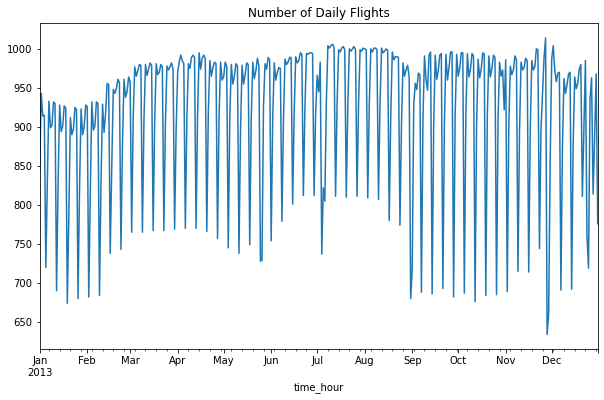

In [7]:
daily_flights.plot(title="Number of Daily Flights", figsize=(10, 6))

### Resample to monthly frequency and plot the resampled data

<AxesSubplot:title={'center':'Number of Monthly Flights'}, xlabel='time_hour'>

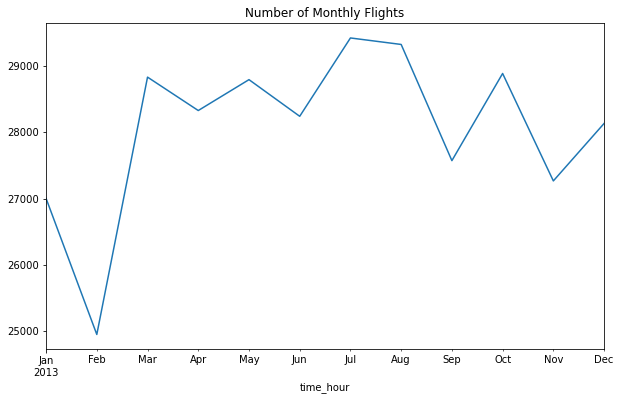

In [8]:
monthly_flights = df.resample('M').size()
monthly_flights.plot(title="Number of Monthly Flights", figsize=(10, 6))

## Step 4: Visualizing Trends
### Plot Average Departure Delay by Month

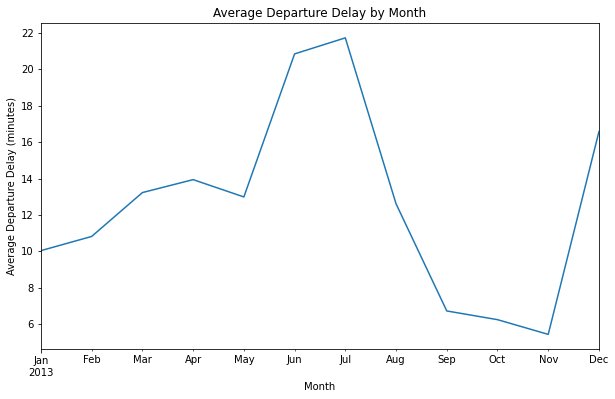

In [16]:
df['dep_delay'].resample('M').mean().plot(title="Average Monthly Departure Delay", figsize=(10, 6))

plt.title('Average Departure Delay by Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

### Number of flights vs Airlines¶

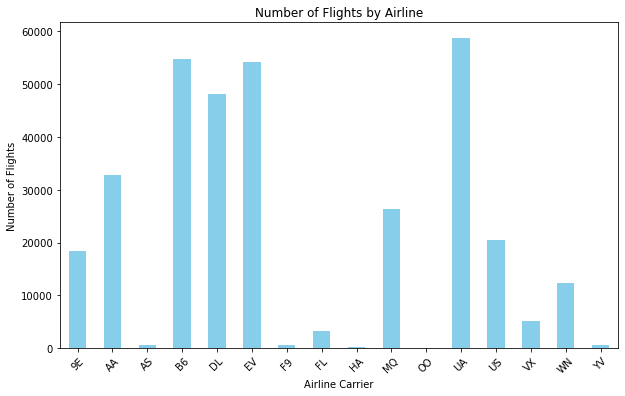

In [19]:
# Group data by 'carrier' and count the number of flights for each airline
flights_per_airline = df.groupby('carrier').size()

# Plot the results as a bar chart
flights_per_airline.plot(kind='bar', figsize=(10, 6), color='skyblue', title='Number of Flights vs Airlines')

# Add labels
plt.title('Number of Flights by Airline')
plt.xlabel('Airline Carrier')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

## Step 5: Decomposing Time Series
To analyze components like trend, seasonality, and noise, use decomposition.

- Trend: Long-term movement in the data.
- Seasonality: Regular patterns, such as increased delays during holidays.
- Residual: Random noise.

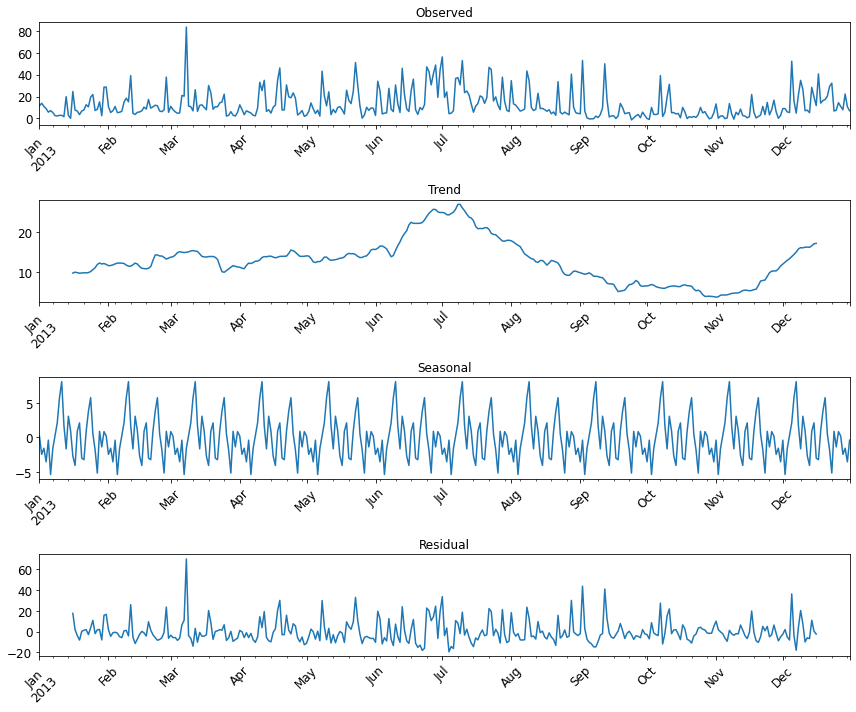

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the daily average departure delay
daily_delays = df['dep_delay'].resample('D').mean()
decomposition = seasonal_decompose(daily_delays, model='additive', period=30)

# Increase the figure size and adjust spacing
fig, axes = plt.subplots(4, 1, figsize=(12, 10))  # Wider and taller figure
decomposition.observed.plot(ax=axes[0], title='Observed', fontsize=12)
decomposition.trend.plot(ax=axes[1], title='Trend', fontsize=12)
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', fontsize=12)
decomposition.resid.plot(ax=axes[3], title='Residual', fontsize=12)

# Rotate x-axis ticks for readability
for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    ax.set_xlabel('')  # Optional: remove xlabel for cleaner look

plt.tight_layout()  # Automatically adjusts subplot spacing
plt.show()

1. Observed (Top Plot)

- Description: This is the original time series data showing the daily average departure delays.
- Purpose: Provides the raw trend of delays over time, including all variations (trend, seasonality, noise).
- Insights: Notice spikes and dips in delays. These may correspond to unusual events, holidays, or weather disruptions.

2. Trend (Second Plot)
- Description: This is the overall trend of the time series, representing the long-term increase or decrease in departure delays.
- Purpose: Highlights whether delays are generally increasing, decreasing, or remaining steady over time.
- Insights: In your plot, the trend seems to gradually increase in the middle of the year and then stabilize. This could indicate operational issues or seasonal demand shifts.

3. Seasonal (Third Plot)
- Description: Captures repeating patterns in the data (e.g., daily, weekly, or monthly cycles).
- Purpose: Helps identify regular fluctuations caused by factors such as holidays, weekends, or specific time periods.
- Insights: The cyclical pattern here repeats roughly every 30 days, matching the period you provided. It might show monthly operational changes, holiday traffic, or demand variations.

4. Residual (Bottom Plot)
- Description: The "leftover" or unexplained portion of the data after removing the trend and seasonal components.
- Purpose: Indicates randomness or noise in the data, which might be due to unpredictable events (e.g., weather or technical issues).
- Insights: If the residuals are randomly distributed, it suggests the decomposition model fits well. If there are patterns, consider refining the model or using a different approach

Takeaways from these Graphs:
- Spikes in Observed Data:
Large spikes in departure delays may indicate operational disruptions or other significant events.
- Gradual Trend Changes:
The trend component indicates an increase in delays in the middle of the year, tapering toward the end.
- Seasonal Cycles:
Repeating monthly patterns suggest predictable fluctuations (e.g., busier periods due to holidays or demand peaks).
- Randomness in Residuals:
The residuals appear scattered, which means the trend and seasonality capture most of the variability in the data.

# Step 6: Time-Based Slicing
We can filter data for specific time periods or date ranges.
Slicing allows us to zoom in on specific timeframes to analyze data in detail.

In [23]:
# Select flights in January 2013
january_2013 = df['2013-01']

# Select flights between two specific dates
selected_range = df['2013-01-01':'2013-01-15']

print(selected_range.head())

                     id  year  month  day  dep_time  sched_dep_time  \
time_hour                                                             
2013-01-01 05:00:00   0  2013      1    1     517.0             515   
2013-01-01 05:00:00   1  2013      1    1     533.0             529   
2013-01-01 05:00:00   2  2013      1    1     542.0             540   
2013-01-01 05:00:00   3  2013      1    1     544.0             545   
2013-01-01 06:00:00   4  2013      1    1     554.0             600   

                     dep_delay  arr_time  sched_arr_time  arr_delay  ...  \
time_hour                                                            ...   
2013-01-01 05:00:00        2.0     830.0             819       11.0  ...   
2013-01-01 05:00:00        4.0     850.0             830       20.0  ...   
2013-01-01 05:00:00        2.0     923.0             850       33.0  ...   
2013-01-01 05:00:00       -1.0    1004.0            1022      -18.0  ...   
2013-01-01 06:00:00       -6.0     812.0      

/Users/mir/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  
/Users/mir/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  """


# Step 7: Analyzing Seasonal Trends
Let's examine how delays vary across months or weekdays.

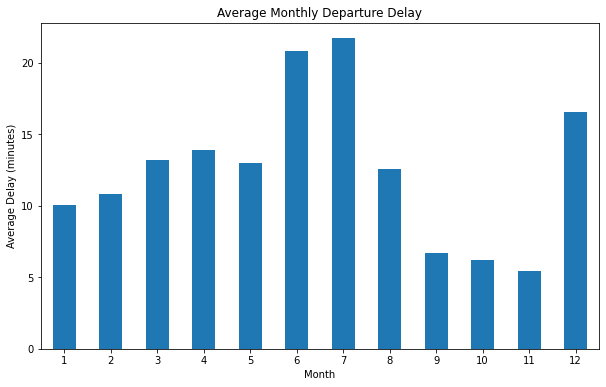

In [26]:
# Calculate average delay per month
monthly_delays = df.groupby(df.index.month)['dep_delay'].mean()

# Plot the results
monthly_delays.plot(kind='bar', title="Average Monthly Departure Delay", figsize=(10, 6))
plt.xlabel("Month")
plt.ylabel("Average Delay (minutes)")
plt.xticks(rotation=0)
plt.show()

Grouping by month shows seasonal patterns (here: more delays in High Seasons: June, July and December).

## Step 8: Handling Missing Data
Missing values can distort analysis. Fill or drop them appropriately.

In [27]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values in departure delay with 0
df['dep_delay'] = df['dep_delay'].fillna(0)

# Drop rows with missing critical fields
df = df.dropna(subset=['arr_time', 'dep_time'])


id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
name                 0
weekday              0
dtype: int64


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 328063 entries, 2013-01-01 05:00:00 to 2013-09-30 23:00:00
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              328063 non-null  int64  
 1   year            328063 non-null  int64  
 2   month           328063 non-null  int64  
 3   day             328063 non-null  int64  
 4   dep_time        328063 non-null  float64
 5   sched_dep_time  328063 non-null  int64  
 6   dep_delay       328063 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  328063 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         328063 non-null  object 
 11  flight          328063 non-null  int64  
 12  tailnum         328063 non-null  object 
 13  origin          328063 non-null  object 
 14  dest            328063 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        328063

## Step 9: Correlation Analysis
Explore relationships between features, such as dep_delay and arr_delay.

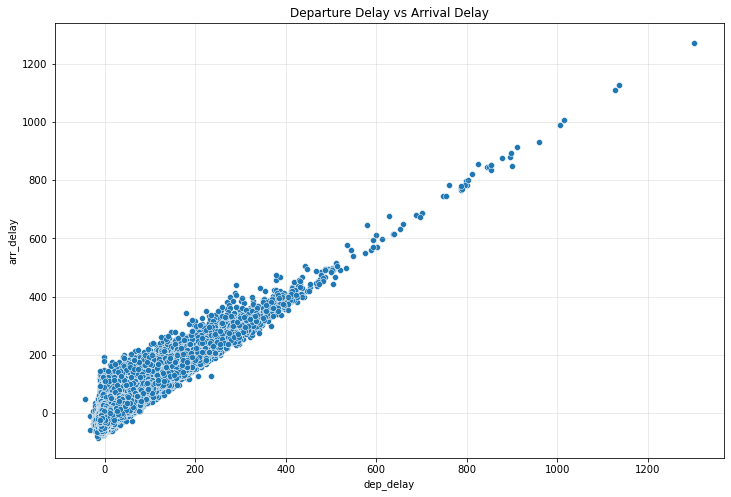

In [31]:
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 8))  # Larger figure size (width=12, height=8)

# Scatter plot to visualize correlation
sns.scatterplot(x='dep_delay', y='arr_delay', data=df)
plt.title("Departure Delay vs Arrival Delay")

# Adding gridlines for better visualization
plt.grid(alpha=0.3)

plt.show()
